In [2]:
import math
import numpy as np
from scipy.io import wavfile
#from hmmlearn import hmm
import matplotlib.pyplot as plt

In [3]:
def gaussian_generator(mean, deviation, sample_size):
    data = np.array([np.random.normal(mean,deviation) for x in range(sample_size)])
    return data
def gaussian(x, mu, sigma):
    return math.exp(-0.5*((x-mu)/sigma)**2) / sigma / math.sqrt(2*math.pi)

In [4]:
def print_model(model):
    print("means:")
    print(model.means_)
    print('covars:')
    print(model.covars_)
    print('Матрица переходов')
    print(np.round(model.transmat_,5))
    print()
    return

In [5]:
import hmmlearn
# print(hmmlearn.__cached__)
# print(hmmlearn.__doc__)
print(hmmlearn.__new__)

ModuleNotFoundError: No module named 'hmmlearn'

In [6]:
data = gaussian_generator(0, 5, 100)

In [7]:
x = np.linspace(-15,15,100)
gaus = [gaussian(x,0,5) for x in x]

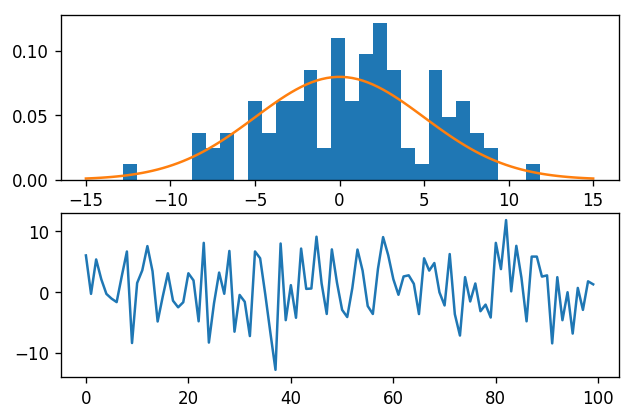

In [8]:
fig,ax = plt.subplots(2,1,dpi = 120)
ax[0].hist(data, 30, density= True)
ax[0].plot(x,gaus)
plt.plot()
plt.plot(data)
plt.show()

In [9]:
data = np.array([])
for _ in range(100):
    temp = np.array([])
    data_stage_one = gaussian_generator(0, 2, 100)
    data_stage_two = gaussian_generator(5,2,100)
    data_stage_three = gaussian_generator(10,2,100)
    temp = np.append(temp,(data_stage_one,data_stage_two,data_stage_three))
    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
print(data.shape)

(30000,)


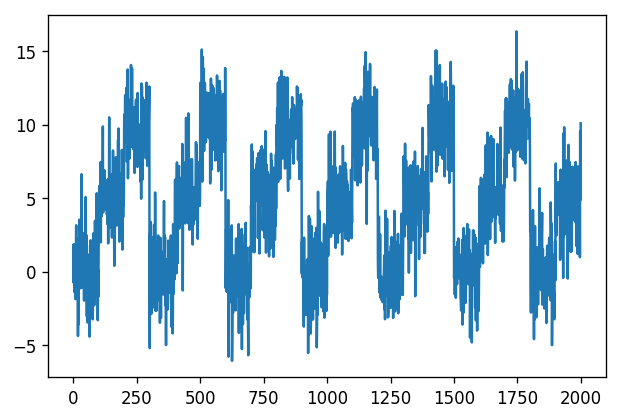

In [10]:
fig = plt.figure(dpi=120)
plt.plot(data[:2000])

#plt.savefig('B:\Sci\Материалы для презентациий\Отчет Лапатин 19.05\source_signal')
plt.show()

In [11]:
data.shape

(30000,)

In [12]:
model = hmm.GaussianHMM(n_components=3,covariance_type='diag')
model.fit(data.reshape(-1,1))

NameError: name 'hmm' is not defined

In [13]:
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

Means and vars of each hidden state


NameError: name 'model' is not defined

In [14]:
model.transmat_

NameError: name 'model' is not defined

In [15]:
print_model(model)

NameError: name 'model' is not defined

In [16]:
labels = model.decode(data.reshape(-1,1))

NameError: name 'model' is not defined

NameError: name 'labels' is not defined

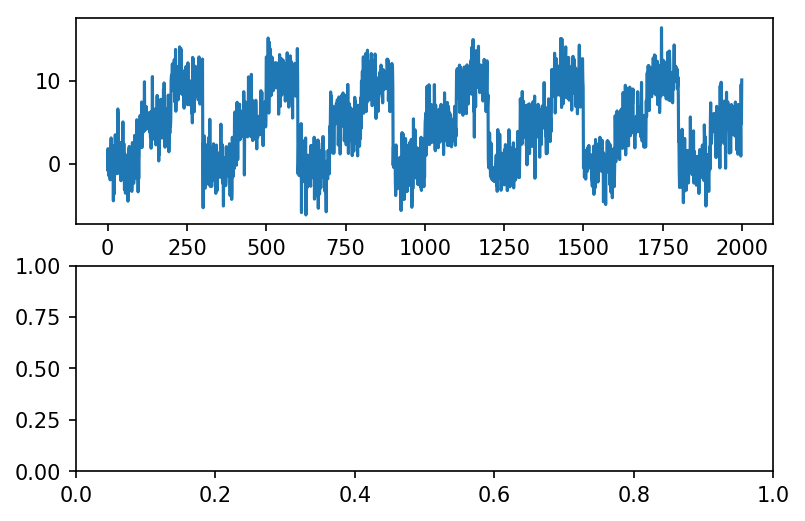

In [17]:
fig,ax = plt.subplots(2,1,dpi=150)
ax[0].plot(data[:2000])
ax[1].plot(labels[1][:2000])
ax[1].set_ylabel('Состояние')

#plt.savefig(r'B:\Sci\Материалы для презентациий\Отчет Лапатин 19.05\состояния hmm')
plt.show()

In [18]:
print(labels[1])

NameError: name 'labels' is not defined

In [19]:
len_random_seq = 1
data = np.array([])
current_stage = 0
seq_stages = []
for _ in range(500):
    if current_stage == 0:
        a = np.random.uniform()
        if a >= 0 and a < 0.8:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a >= 0.8 and a < 0.9:
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a >= 0.9 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
    elif current_stage == 1:
        a = np.random.uniform()
        if a >= 0 and a <= 0.1:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a > 0.1 and a <= 0.9:
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a > 0.9 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
    else:
        a = np.random.uniform()
        if a >= 0 and a <= 0.2:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a > 0.2 and a <= 0.3:
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a > 0.9 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
        #print(2)
    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
print(data.shape)

(500,)


In [20]:
len_random_seq = 1
data = np.array([])
current_stage = 0
seq_stages = []
for _ in range(20000):
    if current_stage == 0:
        a = np.random.uniform()
        if a >= 0 and a < 0.5:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a >= 0.5 and a < 0.7:
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a >= 0.7 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
    elif current_stage == 1:
        a = np.random.uniform()
        if a >= 0 and a <= 0.1:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a > 0.1 and a <= 0.2:
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a > 0.2 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
    else:
        a = np.random.uniform()
        if a >= 0 and a <= 0.2:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a > 0.2 and a <= 0.3:
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a > 0.3 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
        #print(2)
    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
    seq_stages += [current_stage]
print(data.shape)

(20000,)


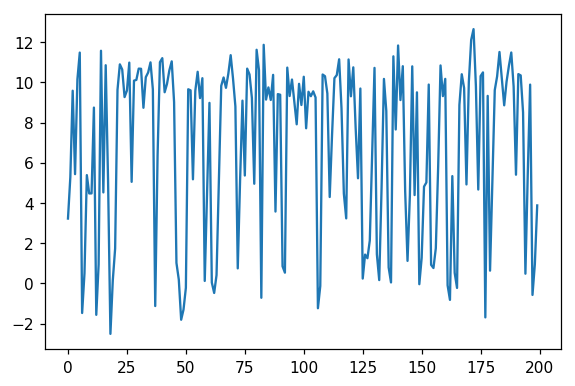

In [22]:
fig = plt.figure(dpi= 111)
plt.plot(data[:200])
#plt.scatter(range(len(data[:200])),data[:200],c=seq_stages[:200])
#plt.savefig('B:\Sci\Материалы для презентациий\Отчет Лапатин 19.05\source_signal')
plt.show()


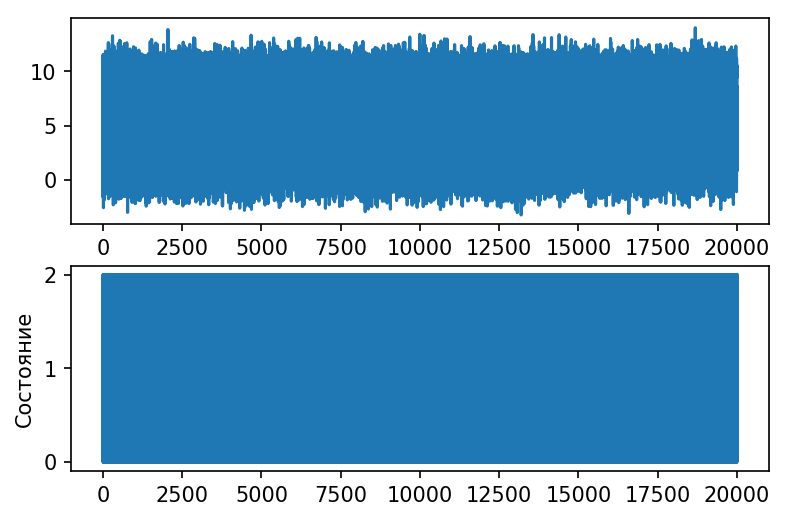

In [23]:
fig,ax = plt.subplots(2,1,dpi=150)
ax[0].plot(data)
ax[1].plot(seq_stages)
ax[1].set_ylabel('Состояние')

plt.show()

In [24]:
model = hmm.GaussianHMM(n_components=3,covariance_type='diag')
model.fit(data.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [25]:
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

Means and vars of each hidden state
0th hidden state
mean =  [10.05786691]
var =  [0.89570959]

1th hidden state
mean =  [-0.06403551]
var =  [0.9000215]

2th hidden state
mean =  [5.45503712]
var =  [5.34546737]



In [26]:
print_model(model)

means:
[[10.05786691]
 [-0.06403551]
 [ 5.45503712]]
covars:
[[[0.89570959]]

 [[0.9000215 ]]

 [[5.34546737]]]
Матрица переходов
[[0.66211 0.19334 0.14455]
 [0.25032 0.48282 0.26686]
 [0.75047 0.10257 0.14696]]



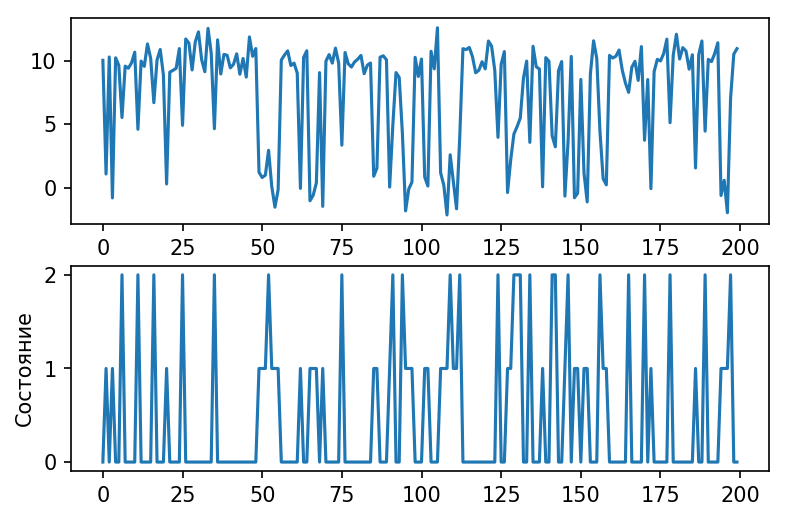

In [27]:
labels = model.decode(data.reshape(-1,1))
fig,ax = plt.subplots(2,1,dpi=150)
ax[0].plot(data[:200])
ax[1].plot(labels[1][:200])
ax[1].set_ylabel('Состояние')
plt.show()

# Модель с гауссовой смесью

In [28]:
# 2 тест
len_random_seq = 1
data = np.array([])
current_stage = 0
seq_stages = []
for _ in range(20000):
    if current_stage == 0:
        a = np.random.uniform()
        if a >= 0 and a < 0.6:
            w = np.random.uniform()
            if w <= 0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(10,1,len_random_seq)
            current_stage = 0
        elif a >= 0.6 and a < 1:
            w = np.random.uniform()
            if w <= 0.9:
                temp = gaussian_generator(25,1,len_random_seq)
            else:
                temp = gaussian_generator(40,1,len_random_seq)
            current_stage = 1
            
    elif current_stage == 1:
        a = np.random.uniform()
        if a >= 0 and a < 0.2:
            w = np.random.uniform()
            if w <=0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(10,1,len_random_seq)
            current_stage = 0
        elif a>=0.2 and a <= 1:
            w = np.random.uniform()
            if w <=0.9:
                temp = gaussian_generator(25,1,len_random_seq)
            else:
                temp = gaussian_generator(40,1,len_random_seq)
            current_stage = 1

    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
    seq_stages += [current_stage]
data = data.reshape(-1,1)
print(data.shape)

(20000, 1)


In [29]:
#Постоянство состояния
len_random_seq = 1
data = np.array([])
current_stage = 0
seq_stages = []
for _ in range(20000):
    if current_stage == 0:
        a = np.random.uniform()
        if a >= 0 and a < 0.9:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a >= 0.90 and a < 0.93 :
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a >= 0.93 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
    elif current_stage == 1:
        a = np.random.uniform()
        if a >= 0 and a <= 0.1:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a > 0.1 and a <= 0.85:
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a > 0.85 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
    else:
        a = np.random.uniform()
        if a >= 0 and a <= 0.05:
            temp = gaussian_generator(0,1,len_random_seq)
            current_stage = 0
        elif a > 0.05 and a <= 0.1:
            temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 1
        elif a > 0.1 and a <= 1:
            temp = gaussian_generator(10,1,len_random_seq) 
            current_stage = 2
        #print(2)
    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
    seq_stages += [current_stage]
print(data.shape)

(20000,)


In [30]:
#Состояния 
len_random_seq = 1
data = np.array([])
current_stage = 0
seq_stages = []
for _ in range(20000):
    if current_stage == 0:
        a = np.random.uniform()
        if a >= 0 and a < 0.6:
            w = np.random.uniform()
            if w <= 0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(10,1,len_random_seq)
            current_stage = 0
        elif a >= 0.6 and a < 1:
            w = np.random.uniform()
            if w <= 0.9:
                temp = gaussian_generator(15,1,len_random_seq)
            else:
                temp = gaussian_generator(20,1,len_random_seq)
            current_stage = 1
            
    elif current_stage == 1:
        a = np.random.uniform()
        if a >= 0 and a < 0.2:
            w = np.random.uniform()
            if w <=0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(10,1,len_random_seq)
            current_stage = 0
        elif a>=0.2 and a <= 1:
            w = np.random.uniform()
            if w <=0.9:
                temp = gaussian_generator(15,1,len_random_seq)
            else:
                temp = gaussian_generator(20,1,len_random_seq)
            current_stage = 1

    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
    seq_stages += [current_stage]
data = data.reshape(-1,1)
print(data.shape)

(20000, 1)


In [31]:
# 3 состояния

In [32]:

len_random_seq = 1
data = np.array([])
current_stage = 0
seq_stages = []
for _ in range(100000):
    if current_stage == 0: 
        a = np.random.uniform()
        if a >= 0 and a < 0.9:
            w = np.random.uniform()
            if w <= 0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 0
        elif a >= 0.9 and a < 0.93:
            w = np.random.uniform()
            if w <= 0.9:
                temp = gaussian_generator(10,1,len_random_seq)
            else:
                temp = gaussian_generator(15,1,len_random_seq)
            current_stage = 1
        else:
            w = np.random.uniform()
            if w <= 0.6:
                temp = gaussian_generator(25,1,len_random_seq)
            else:
                temp = gaussian_generator(30,1,len_random_seq)
            current_stage = 2       
    elif current_stage == 1:
        a = np.random.uniform()
        if a >= 0 and a < 0.1:
            w = np.random.uniform()
            if w <=0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 0
        elif a>=0.1 and a <= 0.95:
            w = np.random.uniform()
            if w <=0.9:
                temp = gaussian_generator(10,1,len_random_seq)
            else:
                temp = gaussian_generator(15,1,len_random_seq)
            current_stage = 1
        else:
            w = np.random.uniform()
            if w <= 0.6:
                temp = gaussian_generator(25,1,len_random_seq)
            else:
                temp = gaussian_generator(30,1,len_random_seq)
            current_stage = 2
    else:
        a = np.random.uniform()
        if a >= 0 and a < 0.15:
            w = np.random.uniform()
            if w <=0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 0
        elif a>=0.15 and a <= 0.85:
            w = np.random.uniform()
            if w <=0.9:
                temp = gaussian_generator(10,1,len_random_seq)
            else:
                temp = gaussian_generator(15,1,len_random_seq)
            current_stage = 1
        else:
            w = np.random.uniform()
            if w <= 0.6:
                temp = gaussian_generator(25,1,len_random_seq)
            else:
                temp = gaussian_generator(30,1,len_random_seq)
            current_stage = 2      

    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
    seq_stages += [current_stage]
data = data.reshape(-1,1)
print(data.shape)

(100000, 1)


In [33]:

len_random_seq = 1
data = np.array([])
current_stage = 0
seq_stages = []
for _ in range(100000):
    if current_stage == 0: 
        a = np.random.uniform()
        if a >= 0 and a < 0.9:
            w = np.random.uniform()
            if w <= 0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 0
        elif a >= 0.9 and a < 0.93:
            w = np.random.uniform()
            if w <= 0.9:
                temp = gaussian_generator(10,1,len_random_seq)
            else:
                temp = gaussian_generator(15,1,len_random_seq)
            current_stage = 1
        else:
            w = np.random.uniform()
            if w <= 0.6:
                temp = gaussian_generator(25,1,len_random_seq)
            else:
                temp = gaussian_generator(30,1,len_random_seq)
            current_stage = 2       
    elif current_stage == 1:
        a = np.random.uniform()
        if a >= 0 and a < 0.1:
            w = np.random.uniform()
            if w <=0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 0
        elif a>=0.1 and a <= 0.95:
            w = np.random.uniform()
            if w <=0.9:
                temp = gaussian_generator(10,1,len_random_seq)
            else:
                temp = gaussian_generator(15,1,len_random_seq)
            current_stage = 1
        else:
            w = np.random.uniform()
            if w <= 0.6:
                temp = gaussian_generator(25,1,len_random_seq)
            else:
                temp = gaussian_generator(30,1,len_random_seq)
            current_stage = 2
    else:
        a = np.random.uniform()
        if a >= 0 and a < 0.15:
            w = np.random.uniform()
            if w <=0.2:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(5,1,len_random_seq)
            current_stage = 0
        elif a>=0.15 and a <= 0.85:
            w = np.random.uniform()
            if w <=0.9:
                temp = gaussian_generator(10,1,len_random_seq)
            else:
                temp = gaussian_generator(15,1,len_random_seq)
            current_stage = 1
        else:
            w = np.random.uniform()
            if w <= 0.6:
                temp = gaussian_generator(25,1,len_random_seq)
            else:
                temp = gaussian_generator(30,1,len_random_seq)
            current_stage = 2      

    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
    seq_stages += [current_stage]
data = data.reshape(-1,1)
print(data.shape)

(100000, 1)


In [34]:
model = hmm.GMMHMM(n_components=3,n_mix=1).fit(data.reshape(-1,1))

In [35]:
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

Means and vars of each hidden state
0th hidden state
mean =  [[10.45471917]]
var =  [3.38352198]

1th hidden state
mean =  [[27.00248368]]
var =  [7.28651443]

2th hidden state
mean =  [[4.04122549]]
var =  [5.20816211]



In [36]:
model.covars_

array([[[3.38352198]],

       [[7.28651443]],

       [[5.20816211]]])

In [37]:
for i in range(model.n_components):
    print(model.covars_[i])

[[3.38352198]]
[[7.28651443]]
[[5.20816211]]


In [38]:
print_model(model)

means:
[[[10.45471917]]

 [[27.00248368]]

 [[ 4.04122549]]]
covars:
[[[3.38352198]]

 [[7.28651443]]

 [[5.20816211]]]
Матрица переходов
[[0.85536 0.05228 0.09236]
 [0.70823 0.14692 0.14486]
 [0.02545 0.07085 0.9037 ]]



In [39]:
model.means_

array([[[10.45471917]],

       [[27.00248368]],

       [[ 4.04122549]]])

In [40]:
seq = model.decode(data.reshape(-1,1))
seq[1]

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
test = np.array([x for x in range(10000)])
model.decode(test.reshape(-1,1))

(-22685139957.267395, array([2, 2, 2, ..., 1, 1, 1]))

In [42]:
seq

(-260842.0620567313, array([0, 0, 0, ..., 0, 0, 0]))

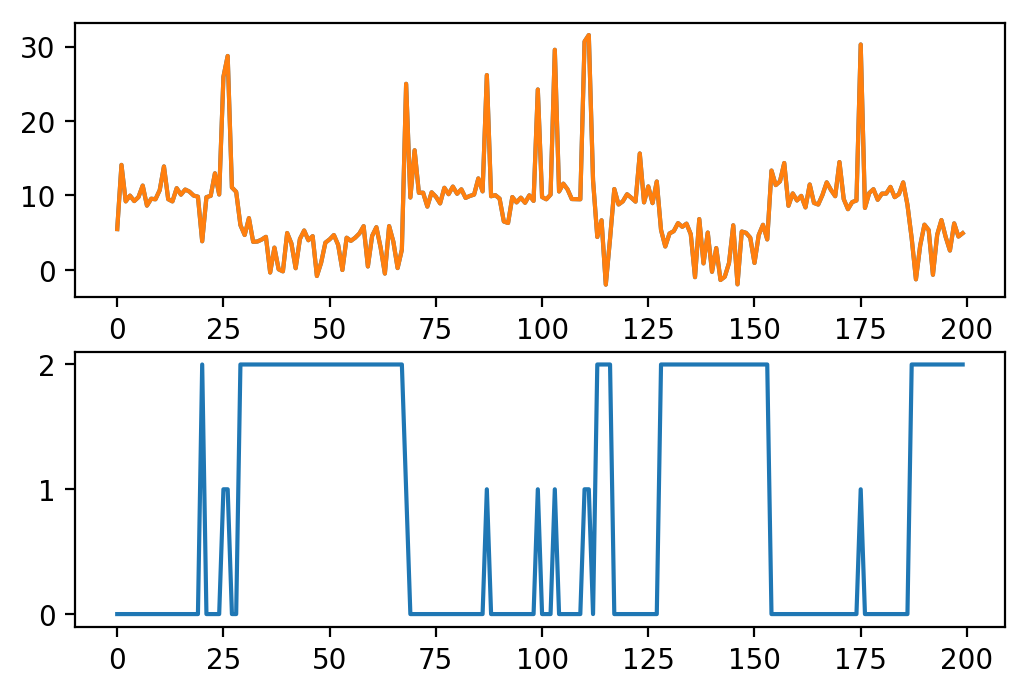

In [43]:
fig, ax = plt.subplots(2,1)
fig.dpi = 200
ax[0].plot(data[:200])
ax[0].plot(data[:200],)
ax[1].plot(seq[1][:200])
plt.show()

In [44]:
new_seq = seq[1].copy()
maska = (new_seq == 1)
new_seq[maska] == 2
maska = (new_seq == 2)
#new_seq[m] == 1

In [45]:
new_seq[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
np.array(seq_stages[:40])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
np.mean(seq_stages == new_seq)

0.00196

In [48]:
maska = (seq_stages != new_seq)
maska

array([False,  True,  True, ...,  True,  True,  True])

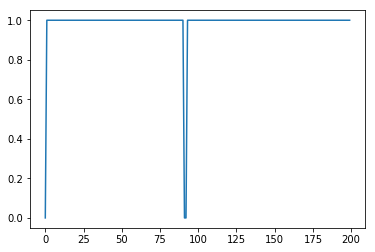

In [49]:
plt.plot(maska[:200])
plt.show()

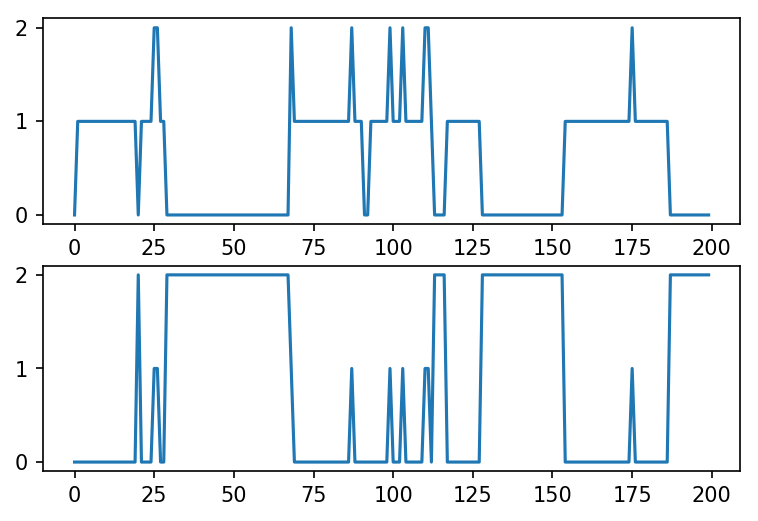

In [50]:
fig, ax = plt.subplots(2,1)
fig.dpi = 150
ax[0].plot(seq_stages[:200])
ax[1].plot(new_seq[:200])
plt.show()

In [51]:
model.weights_

array([[1.],
       [1.],
       [1.]])

In [52]:
print(model.weights_[0])
print(model.weights_[1])

[1.]
[1.]


In [53]:
len_random_seq = 1
data = np.array([])
current_stage = 0
seq_stages = []
for _ in range(100):
    if current_stage == 0:
        a = np.random.uniform()
        if a >= 0 and a < 0.6:
            w = np.random.uniform()
            if w <= 0.6:
                temp = gaussian_generator(0,1,len_random_seq)
            else:
                temp = gaussian_generator(10,2,len_random_seq)
            current_stage = 0
    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
    seq_stages += [current_stage]
print(data.shape)

(100,)


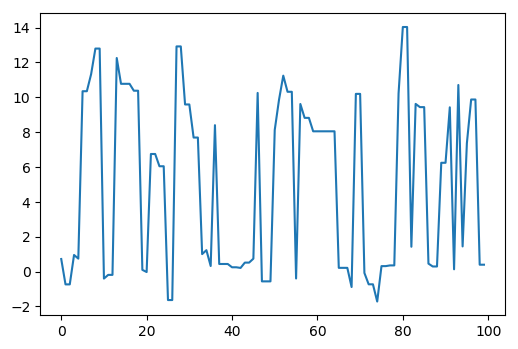

In [54]:
fig = plt.figure(dpi=100)
plt.plot(data[:200])
plt.show()

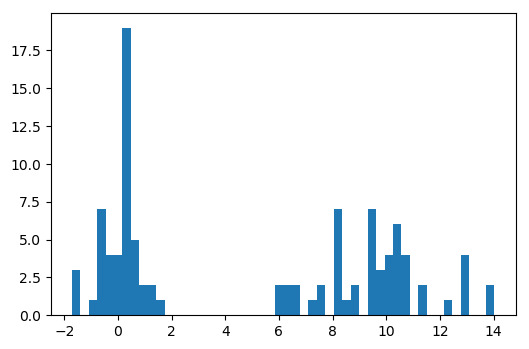

In [55]:
fig = plt.figure(dpi=100)
plt.hist(data,50)
plt.show()

In [56]:
400/2500

0.16

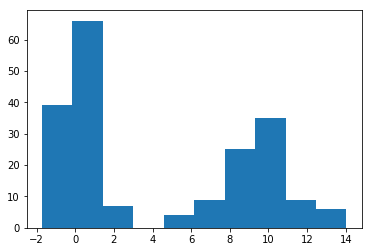

In [57]:
for _ in range(100):
    w = np.random.uniform()
    if w <= 0.6:
        temp = gaussian_generator(0,1,len_random_seq)
    else:
        temp = gaussian_generator(10,2,len_random_seq)
    if len(data) == 0:
        data = temp
    else:
        data = np.append(data,temp)
#plt.plot(data)
plt.hist(data)
plt.show()

In [58]:
from sklearn.mixture import GaussianMixture
mixt = GaussianMixture(n_components=6)
mixt = mixt.fit(data.reshape(-1,1))

In [59]:
print(mixt.means_)
print(mixt.weights_)
print(mixt.covariances_)

[[-0.65913092]
 [10.43542888]
 [ 6.14301743]
 [ 8.81768258]
 [ 0.3438469 ]
 [ 1.12383755]]
[0.20444989 0.2448062  0.04376092 0.15143306 0.22188418 0.13366576]
[[[0.25160388]]

 [[2.18758505]]

 [[0.17759728]]

 [[0.97993271]]

 [[0.1022076 ]]

 [[0.37702437]]]


In [60]:
np.array(data).max()

14.033630725823814

In [61]:
A = np.array([ [[15.06],[10.34]],[[4.5], [1.69]] ])
A.shape

(2, 2, 1)

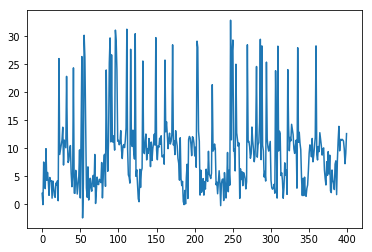

In [62]:
data_sample = model.sample(400)
data_sample = data_sample[0]
plt.plot(data_sample)
plt.show()

In [168]:
import pandas as pd
frame = pd.read_excel(r'B:\Sci\Signals\Сопротивление изоляции.xls')
frame.shape

(998, 3)

In [169]:
values = frame.iloc[2:,1]
values

2      8684
3      8684
4      8684
5      8684
6      8684
7      8678
8      8678
9      8769
10     8899
11     8899
12     8899
13     8899
14     8803
15     8803
16     8803
17     8803
18     8803
19     8803
20     8803
21     8937
22     8626
23     8626
24     8724
25     8724
26     8689
27     8689
28     8689
29     8812
30     8812
31     8662
       ... 
968    8664
969    8744
970    8744
971    8744
972    8691
973    8691
974    8996
975    8795
976    8795
977    8795
978    8795
979    8740
980    8740
981    8874
982    8674
983    8674
984    8602
985    8602
986    8767
987    8689
988    8689
989    8689
990    8689
991    8689
992    8744
993    8680
994    8680
995    8646
996    8646
997    8757
Name: Unnamed: 1, Length: 996, dtype: object

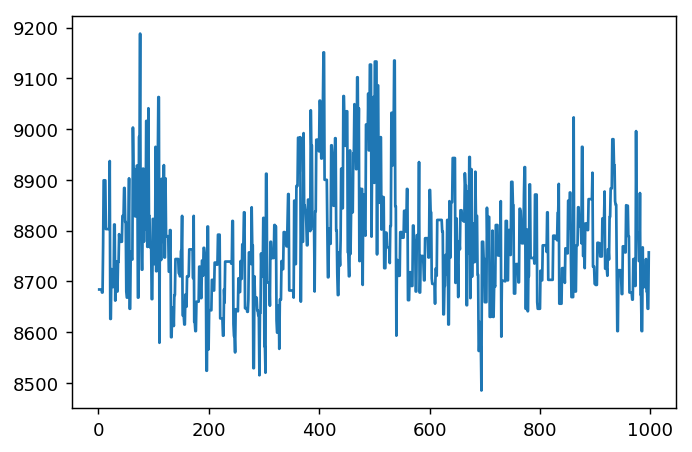

In [170]:
fig = plt.figure(dpi = 130)
plt.plot(values)
plt.show()